In [1]:
import pandas as pd
import os
os.getcwd()
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # remove warnings
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 15, 5

In [52]:
path = "temp_sul_01012000_30062022.csv"
df = pd.read_csv(path, parse_dates=["DATA_HORA"], 
                 usecols=["UF", "ESTACAO", "DATA_HORA", "PRECIPITAÇÃO_TOTAL_HORÁRIO", "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA",  
                          "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA", "TEMPERATURA_DO_PONTO_DE_ORVALHO", "UMIDADE_RELATIVA_DO_AR_HORARIA",
                          "VENTO_VELOCIDADE_HORARIA"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11245944 entries, 0 to 11245943
Data columns (total 9 columns):
 #   Column                                           Dtype         
---  ------                                           -----         
 0   PRECIPITAÇÃO_TOTAL_HORÁRIO                       float64       
 1   PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA  float64       
 2   TEMPERATURA_DO_AR__BULBO_SECO_HORARIA            float64       
 3   TEMPERATURA_DO_PONTO_DE_ORVALHO                  float64       
 4   UMIDADE_RELATIVA_DO_AR_HORARIA                   float64       
 5   VENTO_VELOCIDADE_HORARIA                         float64       
 6   ESTACAO                                          object        
 7   UF                                               object        
 8   DATA_HORA                                        datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 772.2+ MB


### Valores vazios

In [68]:
df.isna().sum()

PRECIPITAÇÃO_TOTAL_HORÁRIO                         1347860
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA    1034183
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA              1036382
TEMPERATURA_DO_PONTO_DE_ORVALHO                    1259133
UMIDADE_RELATIVA_DO_AR_HORARIA                     1269826
VENTO_VELOCIDADE_HORARIA                           1270437
ESTACAO                                                  0
UF                                                       0
DATA_HORA                                                0
dtype: int64

In [69]:
df.describe()

,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
count,9.898084e+06,1.021176e+07,1.020956e+07,9.986811e+06,9.976118e+06,9.975507e+06
mean,1.900260e-01,9.604601e+02,1.888807e+01,1.416665e+01,7.688073e+01,2.501381e+00
std,1.258545e+00,4.391103e+01,5.979249e+00,5.169588e+00,1.790418e+01,2.108208e+00
min,0.000000e+00,8.026000e+02,-9.600000e+00,-4.250000e+01,7.000000e+00,0.000000e+00
25%,0.000000e+00,9.254000e+02,1.500000e+01,1.120000e+01,6.500000e+01,9.000000e-01
50%,0.000000e+00,9.632000e+02,1.900000e+01,1.480000e+01,8.100000e+01,2.200000e+00
75%,0.000000e+00,1.002900e+03,2.290000e+01,1.790000e+01,9.200000e+01,3.600000e+00
max,9.440000e+01,1.049900e+03,4.440000e+01,4.350000e+01,1.000000e+02,4.340000e+01


In [70]:
df.replace(-9999, np.nan, inplace=True) # replace weird values with na

In [71]:
df.describe()

,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
count,9.898084e+06,1.021176e+07,1.020956e+07,9.986811e+06,9.976118e+06,9.975507e+06
mean,1.900260e-01,9.604601e+02,1.888807e+01,1.416665e+01,7.688073e+01,2.501381e+00
std,1.258545e+00,4.391103e+01,5.979249e+00,5.169588e+00,1.790418e+01,2.108208e+00
min,0.000000e+00,8.026000e+02,-9.600000e+00,-4.250000e+01,7.000000e+00,0.000000e+00
25%,0.000000e+00,9.254000e+02,1.500000e+01,1.120000e+01,6.500000e+01,9.000000e-01
50%,0.000000e+00,9.632000e+02,1.900000e+01,1.480000e+01,8.100000e+01,2.200000e+00
75%,0.000000e+00,1.002900e+03,2.290000e+01,1.790000e+01,9.200000e+01,3.600000e+00
max,9.440000e+01,1.049900e+03,4.440000e+01,4.350000e+01,1.000000e+02,4.340000e+01


In [72]:
df.isna().sum()

PRECIPITAÇÃO_TOTAL_HORÁRIO                         1347860
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA    1034183
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA              1036382
TEMPERATURA_DO_PONTO_DE_ORVALHO                    1259133
UMIDADE_RELATIVA_DO_AR_HORARIA                     1269826
VENTO_VELOCIDADE_HORARIA                           1270437
ESTACAO                                                  0
UF                                                       0
DATA_HORA                                                0
dtype: int64

In [73]:
# group by datetime to investigate null values
df_na = pd.concat([df["DATA_HORA"], df.iloc[:, 0:-3]], axis = 1) 
df_na_2 = df_na.groupby("DATA_HORA").mean()
df_na_2.isna().sum()

PRECIPITAÇÃO_TOTAL_HORÁRIO                         1973
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA    1941
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA              1924
TEMPERATURA_DO_PONTO_DE_ORVALHO                    1925
UMIDADE_RELATIVA_DO_AR_HORARIA                     1924
VENTO_VELOCIDADE_HORARIA                           2047
dtype: int64

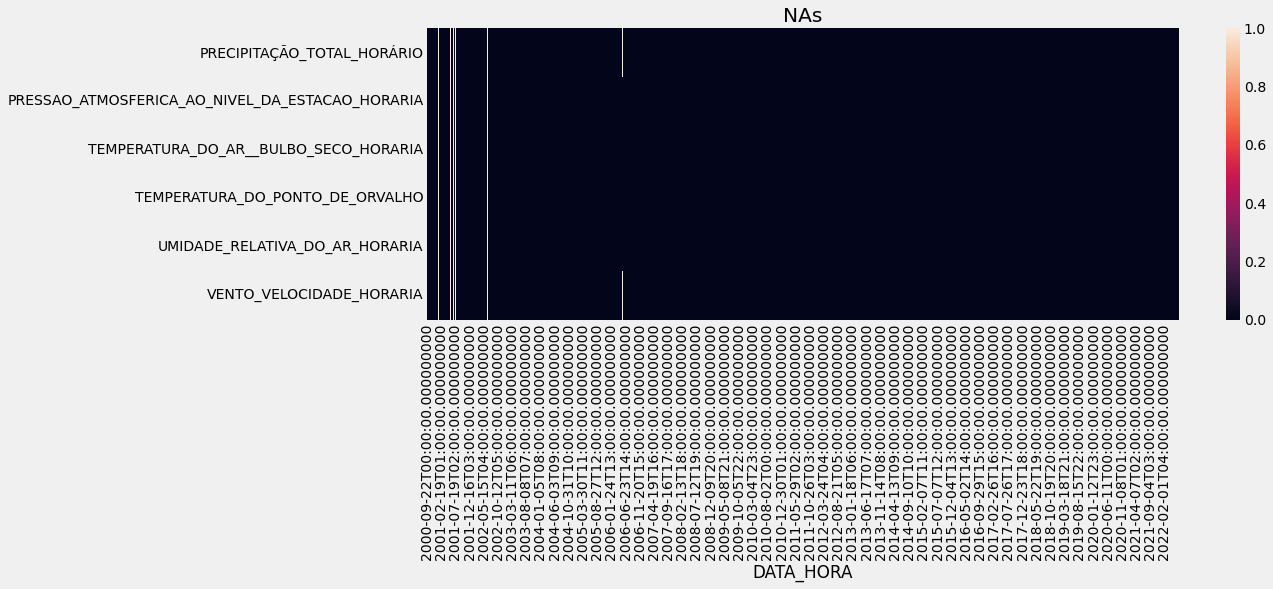

In [96]:
plt.figure()
sns.heatmap(df_na_2.isna().transpose())

plt.title("NAs")
plt.show()

Imputing data

In [81]:
df.columns

Index(['PRECIPITAÇÃO_TOTAL_HORÁRIO',
       'PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA',
       'TEMPERATURA_DO_AR__BULBO_SECO_HORARIA',
       'TEMPERATURA_DO_PONTO_DE_ORVALHO', 'UMIDADE_RELATIVA_DO_AR_HORARIA',
       'VENTO_VELOCIDADE_HORARIA', 'ESTACAO', 'UF', 'DATA_HORA'],
      dtype='object')

In [78]:
df["ESTACAO"].nunique() # number of weather stations

95

In [88]:
#  Grouping by state and datetime
df_2 = pd.concat([df[["UF","DATA_HORA"]], df.iloc[:, 0:-3]], axis = 1)
df_2 = df_2.groupby(["UF", "DATA_HORA"], as_index=False).agg({
                                                            "PRECIPITAÇÃO_TOTAL_HORÁRIO": "sum",
                                                            "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA": "mean",
                                                            "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA": "mean",
                                                            "TEMPERATURA_DO_PONTO_DE_ORVALHO": "mean",
                                                            "UMIDADE_RELATIVA_DO_AR_HORARIA": "mean",
                                                            "VENTO_VELOCIDADE_HORARIA": "mean"
                                                            })
df_2.head()

,UF,DATA_HORA,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_VELOCIDADE_HORARIA
0,PR,2003-01-28 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN
1,PR,2003-01-28 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN
2,PR,2003-01-28 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN
3,PR,2003-01-28 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN
4,PR,2003-01-28 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN


In [90]:
# Rename columns to pivot each one by state
col_rel = {
        "PRECIPITAÇÃO_TOTAL_HORÁRIO": "PRECIPITACAO",
        "PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA": "PRESSAO_ATM",
        "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA": "TEMP_AR_BULBO_SECO",
        "TEMPERATURA_DO_PONTO_DE_ORVALHO": "TEMP_ORVALHO",
        "UMIDADE_RELATIVA_DO_AR_HORARIA": "UMIDADE_RELATIVA_AR",
        "VENTO_VELOCIDADE_HORARIA": "VELOCIDADE_VENTO"
}
df_2.rename(col_rel, axis = 1, inplace = True)

In [98]:
df_2.tail()

,UF,DATA_HORA,PRECIPITACAO,PRESSAO_ATM,TEMP_AR_BULBO_SECO,TEMP_ORVALHO,UMIDADE_RELATIVA_AR,VELOCIDADE_VENTO
531499,SC,2022-06-30 19:00:00,0.0,946.546667,16.666667,6.850000,52.500000,2.186667
531500,SC,2022-06-30 20:00:00,0.0,946.700000,14.653333,7.085714,60.571429,1.686667
531501,SC,2022-06-30 21:00:00,0.0,948.171429,12.371429,7.230769,71.461538,0.985714
531502,SC,2022-06-30 22:00:00,0.0,949.914286,11.100000,7.753846,80.461538,1.500000
531503,SC,2022-06-30 23:00:00,0.0,951.807692,10.738462,7.772727,80.363636,1.576923


In [101]:
ufs = df_2.UF.unique()
df_pivoted = pd.DataFrame()
for uf in ufs:
    df_subset = df_2[df_2.UF == uf]
    df_subset.drop("UF", axis = 1, inplace = True)
    new_cols = []
    for col in df_subset.columns:
        if col == "DATA_HORA":
            new_col_name  = col
        else:
            new_col_name = f"{col}_{uf}"
        new_cols.append(new_col_name)
    df_subset.columns = new_cols
    if df_pivoted.empty:
        df_pivoted = df_subset
    else:
        df_pivoted = pd.merge(df_pivoted, df_subset, on = "DATA_HORA", how = "outer")
df_pivoted.sort_values(by = "DATA_HORA", inplace = True)
df_pivoted.tail()

,DATA_HORA,PRECIPITACAO_PR,PRESSAO_ATM_PR,TEMP_AR_BULBO_SECO_PR,TEMP_ORVALHO_PR,UMIDADE_RELATIVA_AR_PR,VELOCIDADE_VENTO_PR,PRECIPITACAO_RS,PRESSAO_ATM_RS,TEMP_AR_BULBO_SECO_RS,TEMP_ORVALHO_RS,UMIDADE_RELATIVA_AR_RS,VELOCIDADE_VENTO_RS,PRECIPITACAO_SC,PRESSAO_ATM_SC,TEMP_AR_BULBO_SECO_SC,TEMP_ORVALHO_SC,UMIDADE_RELATIVA_AR_SC,VELOCIDADE_VENTO_SC
170251,2022-06-30 19:00:00,0.0,939.886667,21.380000,8.585714,44.285714,1.533333,0.2,975.100000,16.038889,7.577143,58.028571,1.634286,0.0,946.546667,16.666667,6.850000,52.500000,2.186667
170252,2022-06-30 20:00:00,0.0,939.833333,19.526667,9.621429,52.571429,0.786667,0.0,975.059459,14.802778,7.894286,63.485714,1.228571,0.0,946.700000,14.653333,7.085714,60.571429,1.686667
170253,2022-06-30 21:00:00,0.0,938.600000,16.800000,9.423077,62.000000,0.728571,0.0,975.205405,12.330556,7.860000,74.628571,1.023529,0.0,948.171429,12.371429,7.230769,71.461538,0.985714
170254,2022-06-30 22:00:00,0.0,940.241667,14.516667,9.063636,71.000000,0.541667,0.0,975.486486,11.069444,7.668571,80.000000,1.291176,0.0,949.914286,11.100000,7.753846,80.461538,1.500000
170255,2022-06-30 23:00:00,0.0,940.391667,13.750000,9.000000,73.272727,0.350000,0.0,973.362857,10.223529,7.360606,83.121212,1.328125,0.0,951.807692,10.738462,7.772727,80.363636,1.576923


In [99]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190848 entries, 0 to 190847
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA_HORA               190848 non-null  datetime64[ns]
 1   PRECIPITACAO_PR         170256 non-null  float64       
 2   PRESSAO_ATM_PR          148670 non-null  float64       
 3   TEMP_AR_BULBO_SECO_PR   148670 non-null  float64       
 4   TEMP_ORVALHO_PR         148670 non-null  float64       
 5   UMIDADE_RELATIVA_AR_PR  148670 non-null  float64       
 6   VELOCIDADE_VENTO_PR     144431 non-null  float64       
 7   PRECIPITACAO_RS         190848 non-null  float64       
 8   PRESSAO_ATM_RS          188861 non-null  float64       
 9   TEMP_AR_BULBO_SECO_RS   188878 non-null  float64       
 10  TEMP_ORVALHO_RS         188875 non-null  float64       
 11  UMIDADE_RELATIVA_AR_RS  188876 non-null  float64       
 12  VELOCIDADE_VENTO_RS     188416

In [110]:
df_pivoted.isna().sum()

DATA_HORA                     0
PRECIPITACAO_PR           20592
PRESSAO_ATM_PR            42178
TEMP_AR_BULBO_SECO_PR     42178
TEMP_ORVALHO_PR           42178
UMIDADE_RELATIVA_AR_PR    42178
VELOCIDADE_VENTO_PR       46417
PRECIPITACAO_RS               0
PRESSAO_ATM_RS             1987
TEMP_AR_BULBO_SECO_RS      1970
TEMP_ORVALHO_RS            1973
UMIDADE_RELATIVA_AR_RS     1972
VELOCIDADE_VENTO_RS        2432
PRECIPITACAO_SC           20448
PRESSAO_ATM_SC            30571
TEMP_AR_BULBO_SECO_SC     30537
TEMP_ORVALHO_SC           30538
UMIDADE_RELATIVA_AR_SC    30538
VELOCIDADE_VENTO_SC       30580
dtype: int64

In [122]:
df_pivoted_2 = df_pivoted.copy(deep=True)
for col in df_pivoted.columns:
    if df_pivoted_2[col].dtype == 'float64':
        df_pivoted_2[col].interpolate(method="linear", inplace = True)
    else:
        continue
df_pivoted_2.head()

,DATA_HORA,PRECIPITACAO_PR,PRESSAO_ATM_PR,TEMP_AR_BULBO_SECO_PR,TEMP_ORVALHO_PR,UMIDADE_RELATIVA_AR_PR,VELOCIDADE_VENTO_PR,PRECIPITACAO_RS,PRESSAO_ATM_RS,TEMP_AR_BULBO_SECO_RS,TEMP_ORVALHO_RS,UMIDADE_RELATIVA_AR_RS,VELOCIDADE_VENTO_RS,PRECIPITACAO_SC,PRESSAO_ATM_SC,TEMP_AR_BULBO_SECO_SC,TEMP_ORVALHO_SC,UMIDADE_RELATIVA_AR_SC,VELOCIDADE_VENTO_SC
170256,2000-09-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170257,2000-09-22 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170258,2000-09-22 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170259,2000-09-22 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170260,2000-09-22 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1013.9,15.5,14.6,94.0,1.2,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_pivoted.isna().sum()

DATA_HORA                     0
PRECIPITACAO_PR           20592
PRESSAO_ATM_PR            42178
TEMP_AR_BULBO_SECO_PR     42178
TEMP_ORVALHO_PR           42178
UMIDADE_RELATIVA_AR_PR    42178
VELOCIDADE_VENTO_PR       46417
PRECIPITACAO_RS               0
PRESSAO_ATM_RS             1987
TEMP_AR_BULBO_SECO_RS      1970
TEMP_ORVALHO_RS            1973
UMIDADE_RELATIVA_AR_RS     1972
VELOCIDADE_VENTO_RS        2432
PRECIPITACAO_SC           20448
PRESSAO_ATM_SC            30571
TEMP_AR_BULBO_SECO_SC     30537
TEMP_ORVALHO_SC           30538
UMIDADE_RELATIVA_AR_SC    30538
VELOCIDADE_VENTO_SC       30580
dtype: int64

In [124]:
for col in df_pivoted_2.columns:
    col_mean = df_pivoted_2[col].mean()
    if df_pivoted_2[col].dtype == 'float64':
        df_pivoted_2[col].fillna(col_mean, inplace = True)
    else:
        continue
df_pivoted_2.head()

,DATA_HORA,PRECIPITACAO_PR,PRESSAO_ATM_PR,TEMP_AR_BULBO_SECO_PR,TEMP_ORVALHO_PR,UMIDADE_RELATIVA_AR_PR,VELOCIDADE_VENTO_PR,PRECIPITACAO_RS,PRESSAO_ATM_RS,TEMP_AR_BULBO_SECO_RS,TEMP_ORVALHO_RS,UMIDADE_RELATIVA_AR_RS,VELOCIDADE_VENTO_RS,PRECIPITACAO_SC,PRESSAO_ATM_SC,TEMP_AR_BULBO_SECO_SC,TEMP_ORVALHO_SC,UMIDADE_RELATIVA_AR_SC,VELOCIDADE_VENTO_SC
170256,2000-09-22 00:00:00,2.709769,938.397521,19.973766,14.830677,75.20841,2.096141,0.0,981.889222,18.637897,13.800023,76.091329,2.715096,2.941482,961.22934,18.623701,14.475653,79.239923,2.312239
170257,2000-09-22 01:00:00,2.709769,938.397521,19.973766,14.830677,75.20841,2.096141,0.0,981.889222,18.637897,13.800023,76.091329,2.715096,2.941482,961.22934,18.623701,14.475653,79.239923,2.312239
170258,2000-09-22 02:00:00,2.709769,938.397521,19.973766,14.830677,75.20841,2.096141,0.0,981.889222,18.637897,13.800023,76.091329,2.715096,2.941482,961.22934,18.623701,14.475653,79.239923,2.312239
170259,2000-09-22 03:00:00,2.709769,938.397521,19.973766,14.830677,75.20841,2.096141,0.0,981.889222,18.637897,13.800023,76.091329,2.715096,2.941482,961.22934,18.623701,14.475653,79.239923,2.312239
170260,2000-09-22 04:00:00,2.709769,938.397521,19.973766,14.830677,75.20841,2.096141,0.0,1013.900000,15.500000,14.600000,94.000000,1.200000,2.941482,961.22934,18.623701,14.475653,79.239923,2.312239
